<a href="https://colab.research.google.com/github/Yuma-Ichikawa/pytorch/blob/master/transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformerによる前処理

Pytorchは、画像データを処理する場合、前処理をデータセットを作成する前に定義する必要があります。

ただ、Tensorに変更するだけなら、datasetsの引数にToTensor()とするだけで良いです。

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### サンプルをプロットする関数を定義

In [ ]:
def plot_figs(image0, image1, image2):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(image0)
    axes[1].imshow(image1)
    axes[2].imshow(image2)
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')
    plt.show()

### 使用するサンプルデータ

In [ ]:
cifar10 = torchvision.datasets.CIFAR10(root='cifar10_root', train=True, download=True)

Extracting cifar10_root/cifar-10-python.tar.gz to cifar10_root


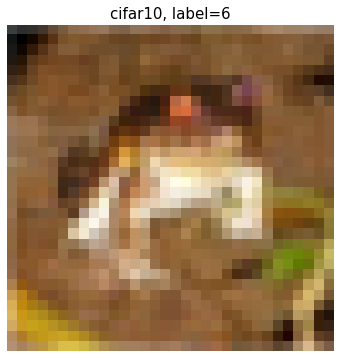

In [ ]:
image, label = cifar10[0]

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
ax.set_title('cifar10, label=6', fontsize=15)
ax.axis('off')
plt.show()

## 画像をTransformで変換する方法

### ToTensor 

PIL Image、ndarrayをTensorに変換

具体的には、縦×横×チャネルで画素値が[0, 255]の画像を[C, H, W]で値の範囲を[0, 1.0]のTensorに変換

In [ ]:
totensor = transforms.ToTensor()
tensor = totensor(image)

torch.Size([3, 32, 32])


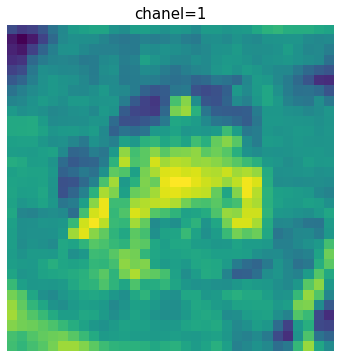

In [ ]:
print(tensor.size())

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(tensor[0])
ax.set_title('chanel=1', fontsize=15)
ax.axis('off')
plt.show()

### RandomRotation

ランダムな角度で回転させる

- degrees : 回転させる角度の範囲（タプルで指定）
- center : 回転の中心位置
- expand : Trueにすると回転した画像が収まるように出力する

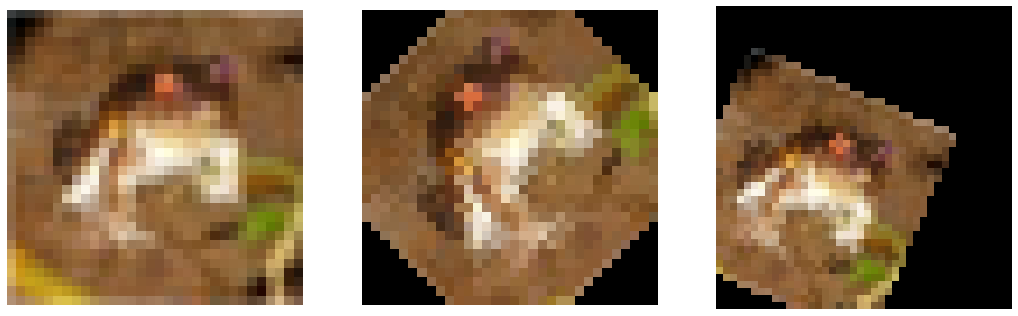

In [ ]:
rotation1 = transforms.RandomRotation(90)
rotation2 = transforms.RandomRotation(degrees=(-90, 90), center=(0,0), expand=True)

image_rotated1 = rotation1(image)
image_rotated2 = rotation2(image)

plot_figs(image, image_rotated1, image_rotated2)

### Grayscale

- num_out_channels : 出力のチャネル数

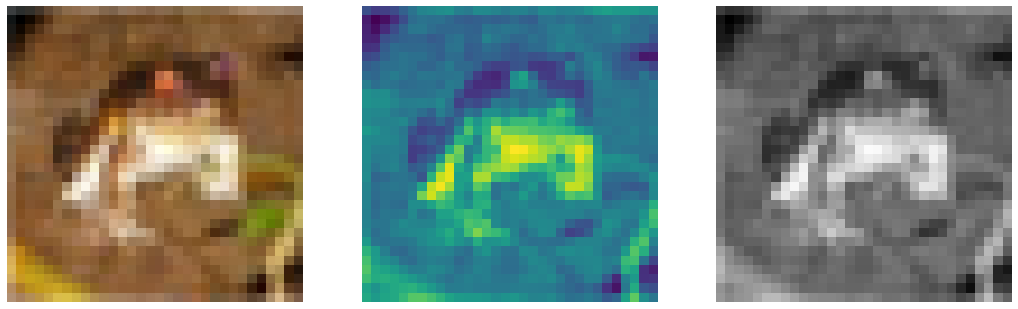

In [ ]:
gray1 = transforms.Grayscale(num_output_channels=1)
gray2 = transforms.Grayscale(num_output_channels=3) 

image_gray1 = gray1(image)
image_gray2 = gray2(image)

plot_figs(image, image_gray1, image_gray2)

### RandomAffine

ランダムにアフィン変換を行います

- degree : 回転角度の指定
- translate : (x方向の移動, y方向の移動)
- scale : スケール変換の設定
- shear: せん断

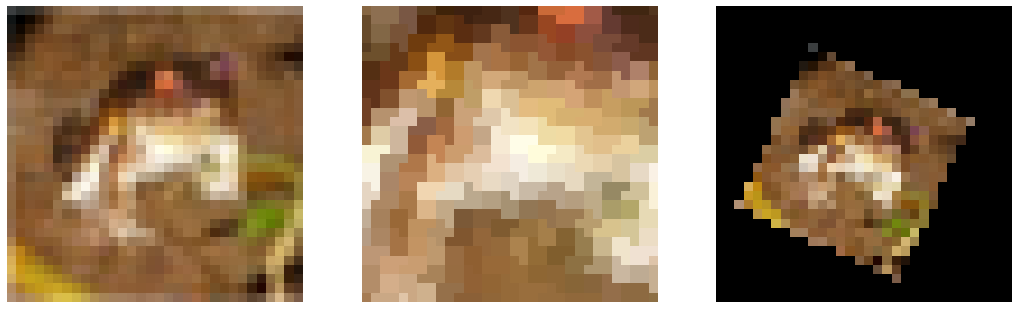

In [ ]:
affine1 = transforms.RandomAffine(degrees=(-30, 30), scale=(0.5, 2.5))
affine2 = transforms.RandomAffine(degrees=(-30, 30), translate=(0.1, 0.1), scale=(0.5, 1.5), shear=(-0.1, 0.1))

image_affine1 = affine1(image)
image_affine2 = affine2(image)

plot_figs(image, image_affine1, image_affine2)

### Random.RandomVerticalFlip

- p : 垂直方向に反転する確率

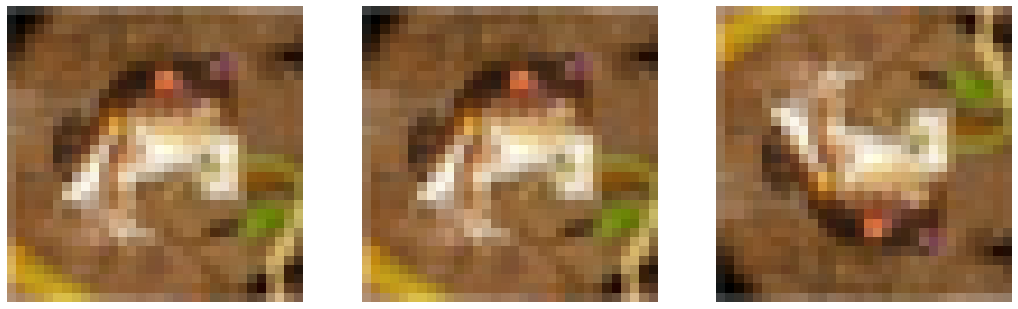

In [ ]:
vflip1 = transforms.RandomVerticalFlip(p=0.8)

image_vflip1 = vflip1(image)
image_vflip2 = vflip1(image)

plot_figs(image, image_vflip1, image_vflip2)

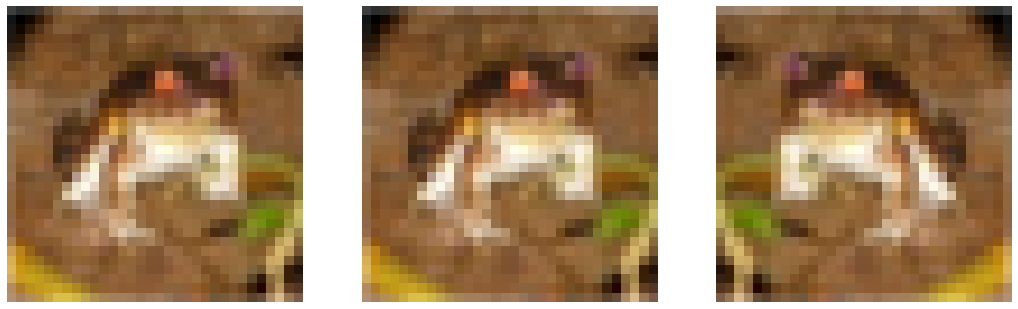

In [ ]:
hflip1 = transforms.RandomHorizontalFlip(p=0.8)

image_hflip1 = hflip1(image)
image_hflip2 = hflip1(image)

plot_figs(image, image_hflip1, image_hflip2)

## TensorをTransformで変換する方法

### Normalize

指定した平均、標準偏差でTensorを正規化する

- mean : 各チャネルの平均
- std : 各チャネルの標準偏差

In [ ]:
norm = transforms.Normalize(mean=[0, 0, 0], std=[1.0, 1.0, 1.0])
normed_tensor = norm(tensor)

### ToPILImage

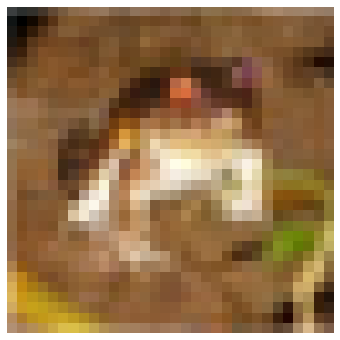

In [ ]:
PIL = transforms.ToPILImage()
image = PIL(tensor)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
ax.axis('off')
plt.show()

### 複数の前処理を画像に施したい場合は、下記のクラスを使用します

1.   Compose : 先頭から順番に実行
2.   RandomAppy : 複数のTransformを指定した確率を行う
3.   RandomChoice : 複数のTransformから１つを選択して行う



In [ ]:
affine = transforms.RandomAffine(degrees=(-10, 10), scale=(0.9, 1.1))
totensor = transforms.ToTensor()
normalize = transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))  

trans = transforms.Compose([affine, totensor, normalize])
data = trans(image)

print(data.size())

torch.Size([3, 32, 32])


## 自作Transformer

Lambdaを使用することで自作の関数を渡し、自作Transformerを作成することができます。



In [ ]:
# 自作関数
def square(x):
    x = x**2
    return x

# sample
data = torch.tensor([1, 2, 3, 4])

# Lambdaクラスを使用
square = transforms.Lambda(square)
squared_data = square(data)

print(squared_data)

tensor([ 1,  4,  9, 16])
